In [106]:
%%javascript

window.load_remote_theme = true;
var theme_url = "https://drostehk.github.io/ipynb-theme/";
var asset_url = 'https://raw.githubusercontent.com/tijptjik/HKSG/gh-pages/assets/';

window.load_local_theme = function(){
    var hostname = document.location.hostname;
    return ((hostname == "localhost" || hostname == '127.0.0.1') && !load_remote_theme);
}

var url = load_local_theme() ? document.location.origin + "/files/theme/custom.js" : theme_url + 'custom.js'

$.getScript(url)

<IPython.core.display.Javascript object>

# Data Science Methods II

* Data Wrangling
    * Loading Data
    * Inspecting Data with Summary Statistics
    * Aggregation
    * Missing Data
* Challenge : Handling Missing Values
* Classification
    * KNN
    * Decision Tress
    * Random Forests
    * Naive Bayes
* Clustering
    * K-Means
* Challenge : Cleaning up factors with NLP and Graph Techniques

![break](assets/theory.png)

## Data Wrangling
### Loading Data

In [2]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# 1.1 Reading data from a csv file

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's also included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [3]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [4]:
broken_df = pd.read_csv('data/bikes.csv')

In [5]:
# Look at the first 3 rows
broken_df[:3]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


let's inspect the file..

In [6]:
lines = []
with open('data/bikes.csv', 'r') as f:
    for line in f.readlines():
        lines.append(line)
lines[:10]

['Date;Berri 1;Br\xe9beuf (donn\xe9es non disponibles);C\xf4te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn\xe9es non disponibles)\r\n',
 '01/01/2012;35;;0;38;51;26;10;16;\r\n',
 '02/01/2012;83;;1;68;153;53;6;43;\r\n',
 '03/01/2012;135;;2;104;248;89;3;58;\r\n',
 '04/01/2012;144;;1;116;318;111;8;61;\r\n',
 '05/01/2012;197;;2;124;330;97;13;95;\r\n',
 '06/01/2012;146;;0;98;244;86;4;75;\r\n',
 '07/01/2012;98;;2;80;108;53;6;54;\r\n',
 '08/01/2012;95;;1;62;98;64;11;63;\r\n',
 '09/01/2012;244;;2;165;432;198;12;173;\r\n']

You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [7]:
fixed_df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


# 1.2 Selecting a column

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [8]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

# 1.3 Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

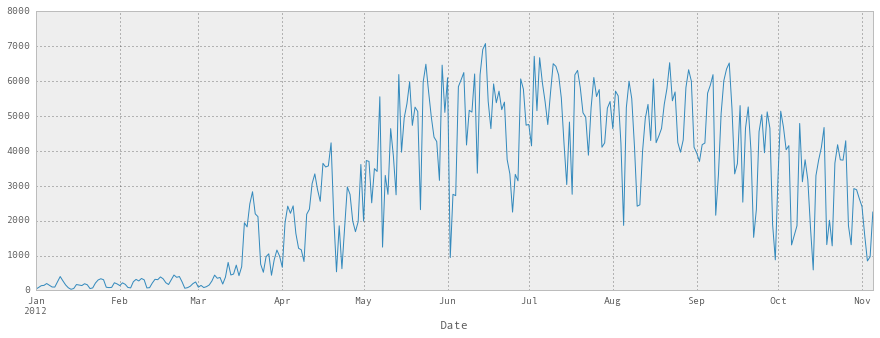

In [9]:
fixed_df['Berri 1'].plot();

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

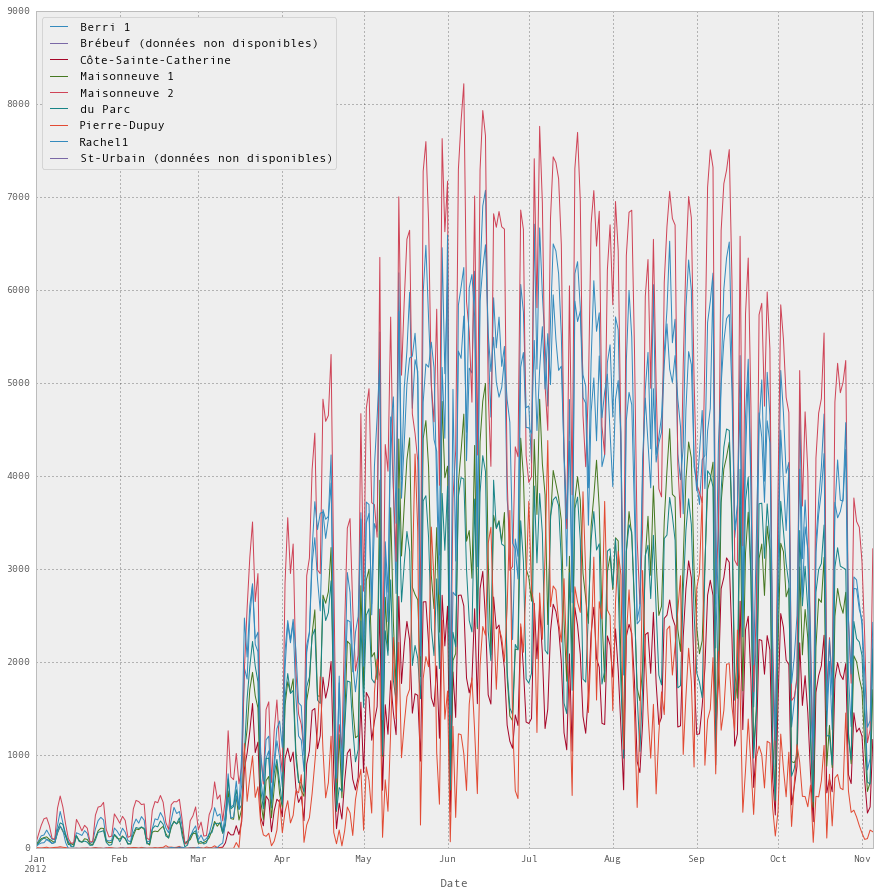

In [10]:
fixed_df.plot(figsize=(15, 15));

# 1.4 Putting all that together

Here's the code we needed to write do draw that graph, all together:

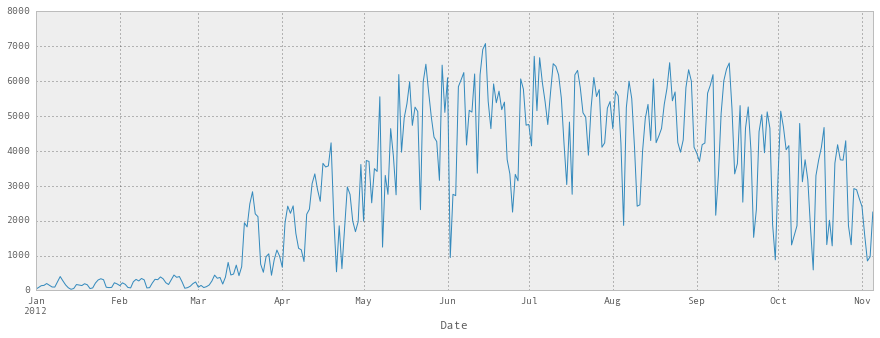

In [11]:
df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df['Berri 1'].plot();

### Inspecting Data with Summary Statistics

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [12]:
complaints = pd.read_csv('data/311-service-requests.csv')

# 2.1 What's even in it? (the summary)

When you print a large dataframe, it will only show you the first few rows.

If you don't see this, don't panic! The default behavior for large dataframes changed between pandas 0.12 and 0.13. Previous to 0.13 it would show you a summary of the dataframe. This includes all the columns, and how many non-null values there are in each column.

In [13]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011,258 WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739913,-74.000790,"(40.73991339303542, -74.00079028612932)"
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"


# 2.2 Selecting columns and rows

To select a column, we index with the name of the column, like this:

In [14]:
complaints['Complaint Type']

0          Noise - Street/Sidewalk
1                  Illegal Parking
2               Noise - Commercial
3                  Noise - Vehicle
4                           Rodent
5               Noise - Commercial
6                 Blocked Driveway
7               Noise - Commercial
8               Noise - Commercial
9               Noise - Commercial
10        Noise - House of Worship
11              Noise - Commercial
12                 Illegal Parking
13                 Noise - Vehicle
14                          Rodent
15        Noise - House of Worship
16         Noise - Street/Sidewalk
17                 Illegal Parking
18          Street Light Condition
19              Noise - Commercial
20        Noise - House of Worship
21              Noise - Commercial
22                 Noise - Vehicle
23              Noise - Commercial
24                Blocked Driveway
25         Noise - Street/Sidewalk
26          Street Light Condition
27            Harboring Bees/Wasps
28         Noise - S

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [15]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


We can combine these to get the first 5 rows of a column:

In [16]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [17]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

# 2.3 Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [18]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


That showed us a summary, and then we can look at the first 10 rows:

In [19]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 2.4 What's the most common complaint type?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [20]:
complaints['Complaint Type'].value_counts()

HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Consumer Complaint                

If we just wanted the top 10 most common complaints, we can do this:

In [21]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
dtype: int64

But it gets better! We can plot them!

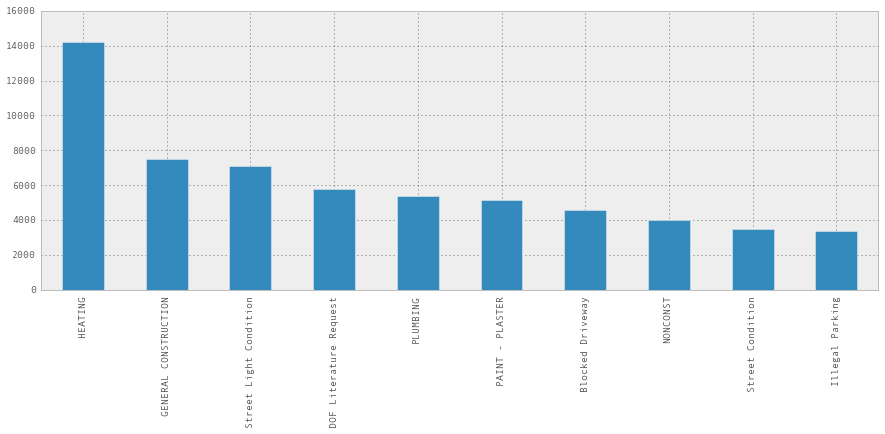

In [22]:
complaint_counts[:10].plot(kind='bar');

### Conditional Selection

# 3.1 Selecting only noise complaints

I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [23]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [24]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [25]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
111039    False
111040    False
111041    False
111042     True
111043    False
111044     True
111045    False
111046    False
111047    False
111048     True
111049    False
111050    False
111051    False
111052    False
111053    False
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, dt

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [26]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"


Or if we just wanted a few columns:

In [27]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


# 3.2 A digression about numpy arrays

On the inside, the type of a column is `pd.Series`

In [28]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

and pandas Series are internally numpy arrays. If you add `.values` to the end of any `Series`, you'll get its internal numpy array

In [31]:
import numpy as np
np.array([1,2,3])

array([1, 2, 3])

In [32]:
pd.Series([1,2,3]).values

array([1, 2, 3])

So this binary-array-selection business is actually something that works with any numpy array:

In [33]:
arr = np.array([1,2,3])

In [34]:
arr != 2

array([ True, False,  True], dtype=bool)

In [35]:
arr[arr != 2]

array([1, 3])

# 3.3 So, which borough has the most noise complaints?

In [36]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [37]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [38]:
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
dtype: float64

Oops, why was that zero? That's no good. This is because of integer division in Python 2. Let's fix it, by converting `complaint_counts` into an array of floats.

In [39]:
noise_complaint_counts / complaint_counts.astype(float)

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
dtype: float64

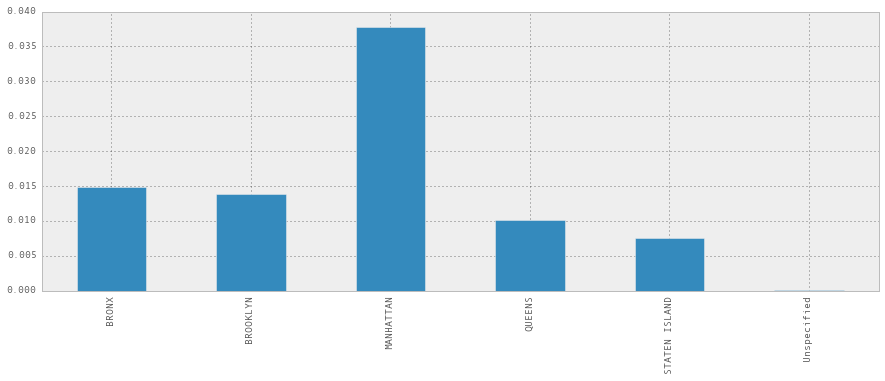

In [40]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

So Manhattan really does complain more about noise than the other boroughs! Neat.

### Aggregation

Okay! We're going back to our bike path dataset here. Let's say we had to report on bike culture in Montreal- where it's more of a commuter city or a biking-for-fun city -- do people bike more on weekends, or on weekdays?

# 4.1 Adding a 'weekday' column to our dataframe

First, we need to load up the data. We've done this before.

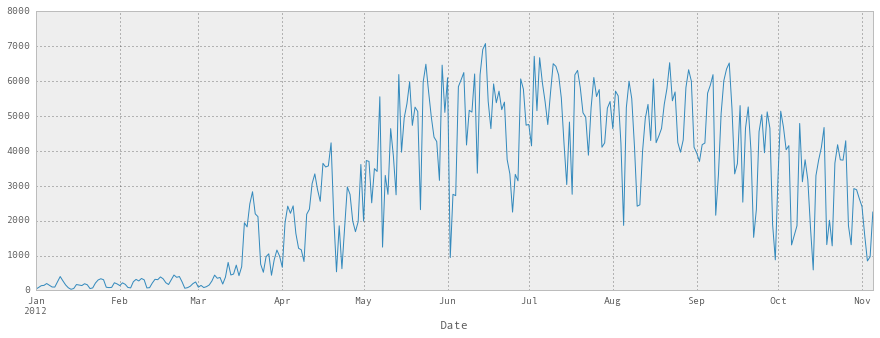

In [41]:
bikes = fixed_df
bikes['Berri 1'].plot();

Next up, we're just going to look at the Berri bike path. Berri is a street in Montreal, with a pretty important bike path. So we're going to create a dataframe with just the Berri bikepath in it

In [42]:
berri_bikes = bikes[['Berri 1']].copy()

In [43]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [44]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10', 
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name=u'Date', length=310, freq=None, tz=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [45]:
berri_bikes.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

We actually want the weekday, though:

In [46]:
berri_bikes.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [47]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# 4.2 Adding up the cyclists by weekday

This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, if you're familiar with that. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [48]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [49]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


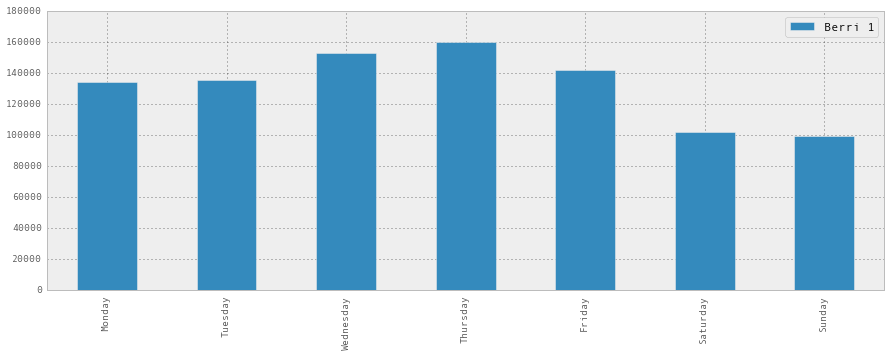

In [50]:
weekday_counts.plot(kind='bar');

So it looks like Montrealers are commuter cyclists -- they bike much more during the week. Neat!

# 4.3 Putting it together

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing `sum` to `max`, `numpy.median`, or any other function you like.

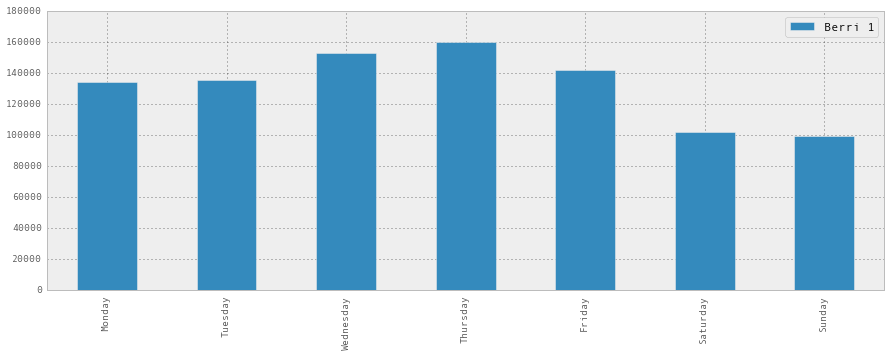

In [51]:
bikes = pd.read_csv('data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar');

![break](assets/theory.png)

## Challenge : Handling Missing Values

In [52]:
server = "localhost"
database = "testdb"
uid = "me"
pwd = "pass"
connection = (server, database, uid, pwd)

connect = 'DRIVER={SQL Server};SERVER=%s;DATABASE=%s;UID=%s;PWD=%s' % connection

import pyodbc
cnxn = pyodbc.connect(connect)
cursor = cnxn.cursor()
cursor.execute("select user_id, user_name from users")
rows = cursor.fetchall()
for row in rows:
    print row.user_id, row.user_name

Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'SQL Server' : file not found (0) (SQLDriverConnect)")

### Load the Data into a Pandas Dataframe

### Inpsect the Data

### Handle the Missing Values

In [92]:
from itertools import tee, imap, izip, combinations

def hammingDistance(str1, str2):
    return sum(imap(str.__ne__, str1, str2))

### Using the Levenshtein Distance

In [57]:
!sudo pip install leven

In [64]:
from leven import levenshtein       
from sklearn.cluster import dbscan
data = ["ACCTCCTAGAAG", "ACCTACTAGAAGTT", "GAATATTAGGCCGA"]
data = ["hello", "hallo","ello", "goedmorgen"]

def lev_metric(x, y):
    i, j = int(x[0]), int(y[0])     # extract indices
    return levenshtein(data[i], data[j])

X = np.arange(len(data)).reshape(-1, 1)
X

array([[0],
       [1],
       [2],
       [3]])

In [65]:
dbscan(X, metric=lev_metric, eps=5, min_samples=2)  

(array([0, 1, 2]), array([ 0,  0,  0, -1]))

In [62]:
# dbscan?

# KNN Classification

> When you are a grown up your brothers become your neighbors and your unconditional brotherhood become your conditional neighborhood.

<footer>~ Amit Kalantri</footer>

![break](assets/theory.png)

## The Classic Classification

Here’s (part of) an example dataset (Fisher’s Iris Data Set)

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

load_iris?

In [9]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[x] for x in iris.target]
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
print 'Independent Variables: \n%s' % iris.feature_names

Independent Variables: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print 'Class Labels: \n%s' % iris.target_names

Class Labels: 
['setosa' 'versicolor' 'virginica']


**Supervised learning** (machine learning) takes a known set of input data and known responses to the data, and seeks to build a predictor model that generates reasonable predictions for the response to new data.

![](assets/classification__mapping_task.png)

### Classification in 4 Steps 

1)  Split Dataset

![](assets/classification_step1.png)

2) Train Model

![](assets/classification_step2.png)

3) Test Model

![](assets/classification_step3.png)

4) Make Predictions

![](assets/classification_step4.png)

**This new data is called out of sample data. The labels for these Out of Sample (OOS) records are unknown**

All Together Now

![](assets/classification_steps.png)

![break](assets/theory.png)

## Building Effective Classifiers

### What types of prediction error will we run into?

1) Training Error

![](assets/classification_error_1.png)

2) Test / Generalization Error

![](assets/classification_error_2.png)

3) OOS Error

![](assets/classification_error_3.png)

**We want to estimate OOS prediction error so we know what to expect from our model.**

### Training Error

Training error is the average loss over the training data.

**Q: Why should we use training & test sets?**

> Thought experiment:
        
Suppose instead, we train our model using the entire dataset.

**Q: How low can we push the training error?**
    
> We can make the model arbitrarily complex (effectively “memorizing” the entire training set).

A: Down to zero! This phenomenon is called overfitting.

### Overfitting

![](assets/overfitting.png)

![](assets/overfitting_underfitting.jpg)

![](assets/overfitting.svg)

### Test / Generalisation Error

The expected error over an independent test sample drawn from the same distribution as that of the training data.

Training error is not a good estimate of OOS accuracy. Suppose we do the train/test split.

**Q: How well does generalization error predict OOS accuracy?**

> Thought experiment:

Suppose we had done a different train/test split.

** Q: Would the generalization error remain the same?** 

A: Of course not!

A: So on its own, generalization error does not predict OOS accuracy very well. It just gives a high-variance estimate of OOS accuracy.

> Thought experiment:

Different train/test splits will give us different generalization errors.

**Q: What if we did a bunch of these and took the average?**

A: Now you’re talking! Cross-validation! 


### Cross-validation

Out of Sample error is the error when using the trained model to predict instances it hasn't seen before. Often predicted by taking the mean of Cross-Validated test errors.

![](assets/10_fold_cv.png)

#### Steps for n-fold cross-validation:

1. Randomly split the dataset into n equal partitions.
1. Use partition 1 as test set & union of other partitions as training set.
1. Find generalization error.
1. Repeat steps 2-3 using a different partition as the test set at each iteration.
1. Take the average generalization error as the estimate of OOS accuracy.

#### Features of n-fold cross-validation:

1. More accurate estimate of OOS prediction error.
1. More efficient use of data than single train/test split.
	1. Each record in our dataset is used for both training and testing.
1. Presents tradeoff between efficiency and computational expense.
	1. 10-fold CV is 10x more expensive than a single train/test split
1. Can be used for model selection.
1. Is _not_ intended to _produce_ the best model, _only_ to score the parameters you've chosen to build a model with!

![break](assets/theory.png)

## KNN Classification

Linear regression is an example of a parametric method; k-nearest-neighbor is an example of a nonparametric method.

Suppose we want to predict the color of the grey dot.

1) Pick a value for k.

![](assets/knn_step1.png)

To prevent ties, one typically uses an odd choice of k for binary classification.

2) Find colors of k nearest neighbors.

![](assets/knn_step2.png)

3) Assign the most common color to the grey dot.

![](assets/knn_step3.png)

**Our definition of “nearest” implicitly uses the Euclidean distance function.**

### Euclidian Distance

We measure distance using the Euclidean distance function.

$$ d(p,q) = \sqrt{(p_n -q_n)^2}$$

That is, for each feature of data, we’d measure the distance between two observations.

Consider the iris data set’s four features, **Sepal length**/**width** and **petal length**/**width**:

$$ d(p, q) = \sqrt{(p_{s.length} - q_{s.length})^2 + (p_{s.width} - q_{s.width})^2  + (p_{p.length} - q_{p.length} ) 2 + (p_{p.width} - q_{p.width})^2} $$

$$ d(p, q) = \sqrt{(5.1 - 4.9)^2 + (3.5 - 3.0)^2  + (1.4 - 1.4)^2 + (.2 - .2)^2} $$

$$ d(p, q) = \sqrt{(.04 + .25 + 0 +0}) = 0.53 $$

Euclidean distance is typical for continuous variables, but other metrics can be used for categorical data. If distance measurement is interesting to you, learn more about **taxicab geometry** (the **L1 norm** from regressions last week!) and the **Minkowski distance**.

For a completely different metric, also learn about how computer scientists use the **Levenshtein distance**!

![break](assets/code.png)

## Implementing the KNN Classification

* Apply the KNN Algorithm
* Using an RNG to cross validate performance

In [107]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set some Pandas options
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# Set some Matplotlib options
matplotlib.rcParams.update({'font.size': 20})

# Store data in a consistent place
DATA_DIR = '../data/'

In [108]:
from matplotlib.colors import ListedColormap
from sklearn import feature_selection
from sklearn.neighbors import KNeighborsClassifier as KNN

In [109]:
# Set the random seed for reproducability.
np.random.seed(12)
# Try this sequence again with the following random seed.
# observe how it changes the scores of K quite dramatically
# np.random.seed(1234)

The best data set to validate any classification algorithm's performance is the [Fisher Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set), which is commonly included in any stats or machine learning package.

### Load the Data

In [110]:
# Load in the dataset
df = sns.load_dataset("iris")

In [111]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [112]:
X = df.ix[:,:-1]
y = df.ix[:,-1]

### Exploratory Data Analysis

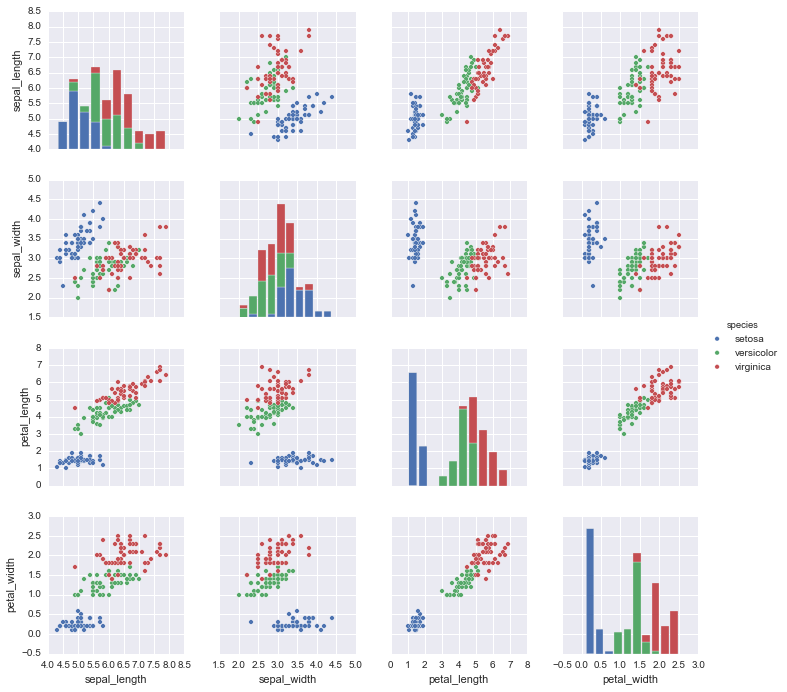

In [113]:
sns.pairplot(df, hue="species", size=2.5);

### Splitting into Training / Test set

There's a couple of ways to do this. There's no reason not to use the built-in method provided by SciKit-Learn, but I want to show you how to do it manually so you (1) known what's going on behind the scene (2) learn a little bit more about python modules and computational thinking

In [114]:
df.ix[105:,-1].value_counts()

virginica    45
dtype: int64

In [115]:
# Create the training (and test) set using the Random Number Generator

# select 70% as training dataset
n = int(len(y) * .7)

In [116]:
np.ones(n)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [117]:
type(np.ones(n))

numpy.ndarray

In [118]:
np.r_[np.ones(n),np.zeros(n)].astype(bool)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [119]:
# Let's randomly sample rows to include in our training data-set.
# r_ is a short form for concatenate
idx = np.r_[np.ones(n), np.zeros(len(y) - n)].astype(bool)
# Shuffle the index
np.random.shuffle(idx)

In [120]:
np.random.uniform(0, 1, len(y))

array([ 0.21060764,  0.37744078,  0.40284721,  0.88517769,  0.20215434,
        0.41901483,  0.64795917,  0.51164295,  0.33383249,  0.77847343,
        0.13543513,  0.19171077,  0.40258915,  0.78684447,  0.25380819,
        0.10948542,  0.93067601,  0.12638728,  0.60500539,  0.29012194,
        0.62652939,  0.65947595,  0.06772616,  0.35544292,  0.33472408,
        0.17750637,  0.00800334,  0.0104384 ,  0.5974588 ,  0.08463852,
        0.31566824,  0.96861833,  0.87358255,  0.91278399,  0.16989826,
        0.3168079 ,  0.24178024,  0.49095497,  0.54394341,  0.40545439,
        0.74241031,  0.64373302,  0.65934335,  0.14922369,  0.74658379,
        0.6414476 ,  0.29823103,  0.3758279 ,  0.98862787,  0.34459494,
        0.343445  ,  0.61365345,  0.61839271,  0.01335342,  0.57443279,
        0.77767945,  0.94988208,  0.70298217,  0.11620573,  0.24660148,
        0.41893868,  0.63203155,  0.09547025,  0.39030921,  0.32196759,
        0.97132529,  0.96918238,  0.74341797,  0.5176893 ,  0.16

In [121]:
# Or more concisely
idx = np.random.uniform(0, 1, len(y)) >= 0.3

In [122]:
# Or by using the `Jason method`
idex = list(df.index)
np.random.shuffle(idex)
df.ix[idex[:105],:]

,sepal_length,sepal_width,petal_length,petal_width,species
84,5.4,3.0,4.5,1.5,versicolor
45,4.8,3.0,1.4,0.3,setosa
46,5.1,3.8,1.6,0.2,setosa
85,6.0,3.4,4.5,1.6,versicolor
71,6.1,2.8,4.0,1.3,versicolor
80,5.5,2.4,3.8,1.1,versicolor
122,7.7,2.8,6.7,2.0,virginica
11,4.8,3.4,1.6,0.2,setosa
89,5.5,2.5,4.0,1.3,versicolor
7,5.0,3.4,1.5,0.2,setosa


In [123]:
X_train, X_test = X[idx], X[idx==False]
y_train, y_test = y[idx], y[idx==False]

In [124]:
# Or by using the built-in method from SciKit-Learn
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.30,
                                        random_state=10)

In [125]:
# Let's test various values of K
n_neighbors = range(1,51,2)

In [126]:
# Loop through each neighbors value from 1 to 51 and append
# the scores
scores = []
for n in n_neighbors:
    clf = KNN(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

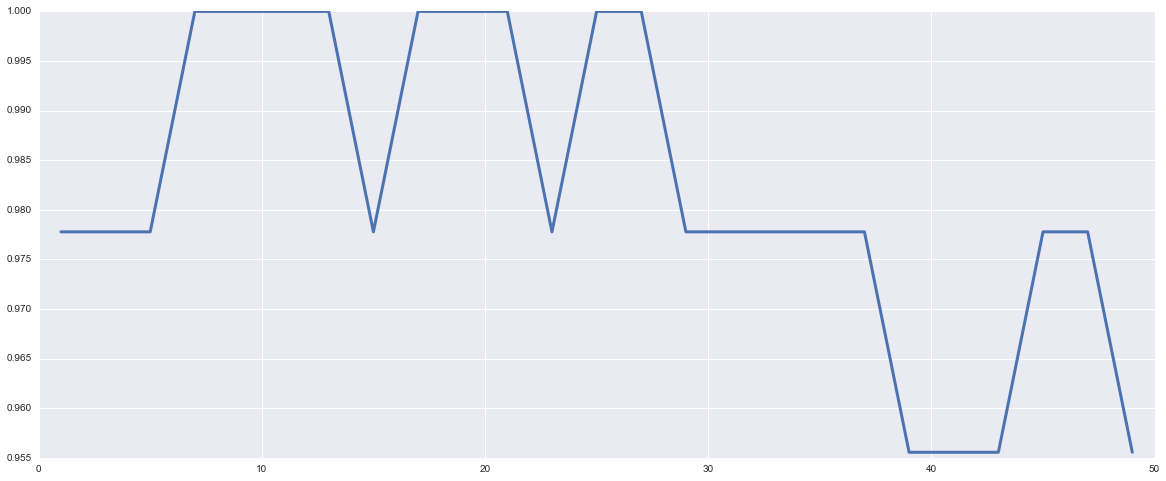

In [127]:
plt.figure(figsize=(20,8))
plt.plot(n_neighbors, scores, linewidth=3.0)
plt.show()

### Application of Cross Validation

The work above shows that at 11 neighbors, we can get an ideal result that doesn't overfit the data. To verify this, we'll use cross validation.

In [128]:
scores = []
idx = np.random.uniform(0, 1, len(X)) >= 0.3
for n in range(5):
    np.random.shuffle(idx)
    X_train, X_test = X[idx], X[idx == False]
    y_train, y_test = y[idx], y[idx == False]
    clf = KNN(11, weights='uniform')
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

In [129]:
scores

[0.97727272727272729,
 0.97727272727272729,
 0.97727272727272729,
 0.93181818181818177,
 0.95454545454545459]

In [130]:
np.mean(scores)

0.96363636363636362

### Simplifying the Model

To showcase our whole model's performance, we can plot our algorithm against the two most significant features available in this data set.

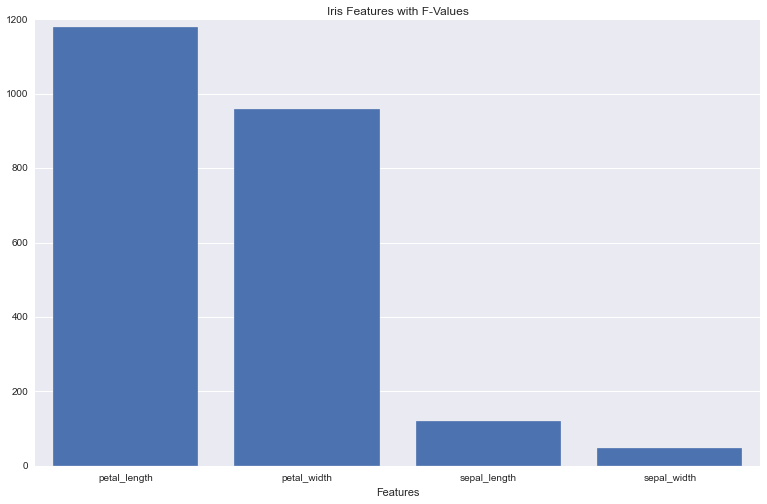

In [131]:
# Let's figure out what our most powerful features are.

F = feature_selection.f_classif(X, y)[0]
title = 'Iris Features with F-Values'

plt.figure(figsize=(13, 8))
ax = sns.barplot(x=df.columns[:-1],y=F)
ax.set_title(title)
ax.set(xlabel="Features");

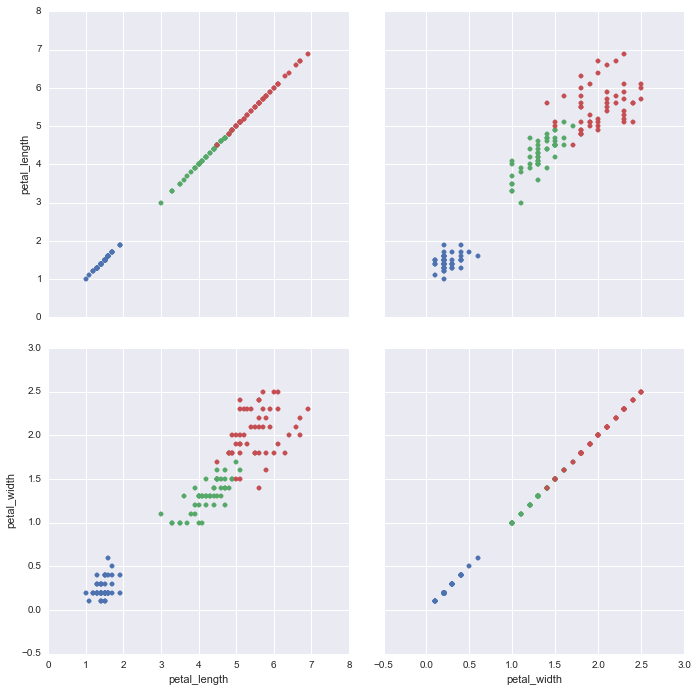

In [132]:
g = sns.PairGrid(df, vars=["petal_length", "petal_width"],
                 hue="species", aspect=1, size=5)
g.map(plt.scatter)

### Visualising the Decision Boundaries

In [133]:
h = .02  # step size in the mesh

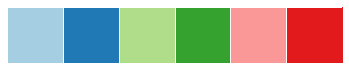

In [134]:
# Create color maps
col_map = sns.color_palette("Paired")
sns.palplot(col_map)
cmap_light = ListedColormap(['#A6CEE3', '#AFDD8A', '#FA9897'])
cmap_bold = ListedColormap(['#2078B4', '#35A12E', '#E31A1C'])

In [135]:
X_ = X.ix[:, 2:].values

In [136]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
         ...    
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, dtype: object

In [137]:
# instead of numers, lets' encode them as numbers
a = list(y.unique())

In [138]:
a

['setosa', 'versicolor', 'virginica']

In [139]:
y_ = [a.index(v) for v in y]

In [140]:
y_

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [141]:
clf = KNN(11, weights='uniform')
clf.fit(X_, y_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=11, p=2, weights='uniform')

In [147]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]*[y_min, y_max].
x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1

In [149]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [150]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

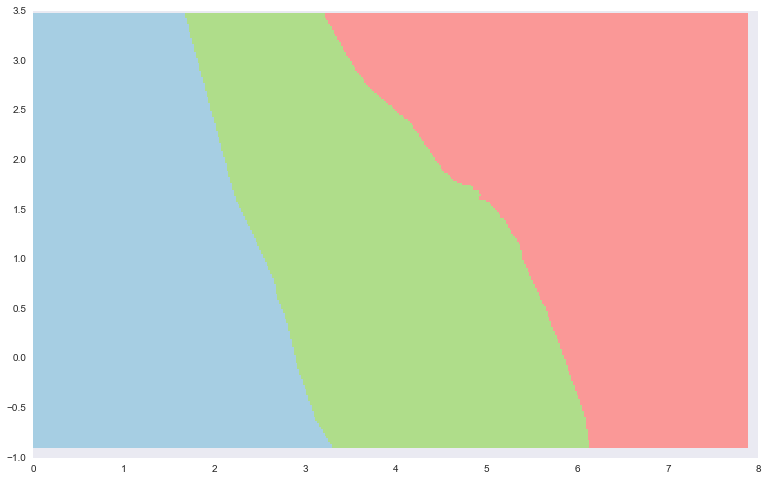

In [151]:
from matplotlib.pyplot import pcolormesh
plt.figure(figsize=(13,8))
pcolormesh(xx, yy, Z, cmap=cmap_light);

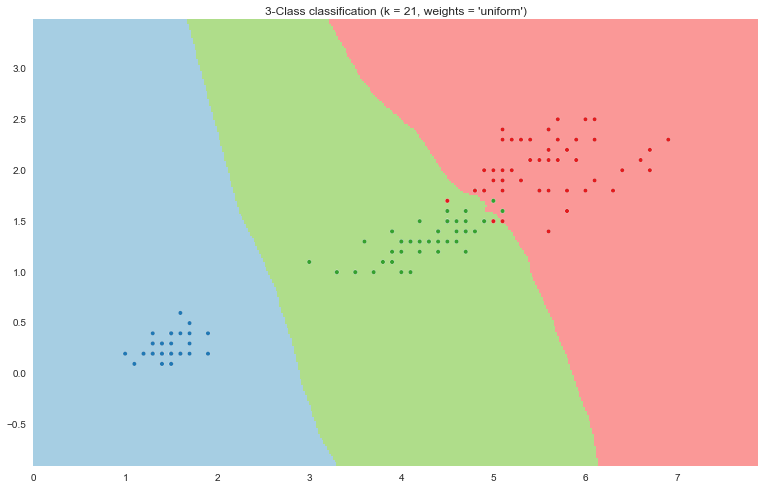

In [152]:
# Plot also the training points
plt.figure(figsize=(13,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
         % (21, 'uniform'));

![break](assets/mountain.png)

## Discussion

1. What are some potential setbacks or pitfalls to the KNN algorithm?
2. What are some potential implementation changes to the algorithm that could be made to get around these pitfalls?

* What if features aren't same units?
* What if the data isn't normalised?
* What if one feature is more important than the other?

## Getting around the Gotchas!

### Normalisation

In [153]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [154]:
"""
Normalise a dataframe, centered around 0
"""

X_norm = (X - X.mean()) / (X.max() - X.min())

In [155]:
X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.206481,0.184444,-0.399661,-0.416389
1,-0.262037,-0.023889,-0.399661,-0.416389
2,-0.317593,0.059444,-0.416610,-0.416389
3,-0.345370,0.017778,-0.382712,-0.416389
4,-0.234259,0.226111,-0.399661,-0.416389


In [156]:
X_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-3.671137e-16,-3.256654e-16,-4.263256e-16,-2.842171e-16
std,2.300184e-01,1.816110e-01,2.992031e-01,3.175990e-01
min,-4.287037e-01,-4.405556e-01,-4.674576e-01,-4.580556e-01
25%,-2.064815e-01,-1.072222e-01,-3.657627e-01,-3.747222e-01
50%,-1.203704e-02,-2.388889e-02,1.003390e-01,4.194444e-02
75%,1.546296e-01,1.011111e-01,2.274576e-01,2.502778e-01
max,5.712963e-01,5.594444e-01,5.325424e-01,5.419444e-01


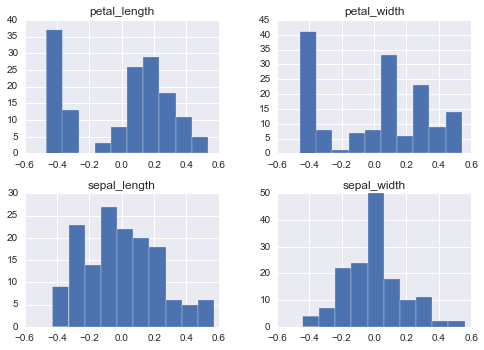

In [157]:
# plt.figure(figsize=(13,8))
X_norm.hist();

In [158]:
"""
Standardise a set of columns in a dataframe, between 0 and 1
"""

X_standard = (X - X.min()) / (X.max() - X.min())

In [159]:
X_standard.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [160]:
X_standard.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


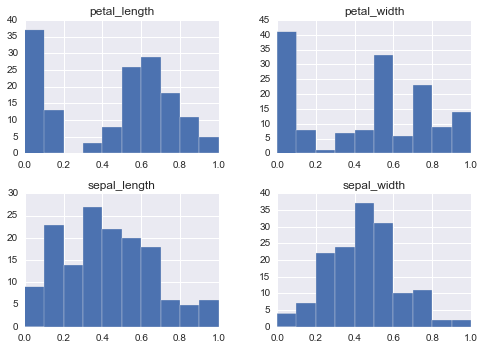

In [161]:
X_standard.hist();

In [162]:
X.columns

Index([u'sepal_length', u'sepal_width', u'petal_length', u'petal_width'], dtype='object')

In [163]:
"""
Weight a set of columns in a dataframe, by 2 and 1/2
"""
X_weighted = pd.DataFrame.join(X_norm.ix[:,:2] * 2, X_norm.ix[:,2:] / 2)

In [164]:
X_weighted.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.412963,0.368889,-0.199831,-0.208194
1,-0.524074,-0.047778,-0.199831,-0.208194
2,-0.635185,0.118889,-0.208305,-0.208194
3,-0.690741,0.035556,-0.191356,-0.208194
4,-0.468519,0.452222,-0.199831,-0.208194


In [165]:
X_weighted.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-7.342275e-16,-6.513308e-16,-2.131628e-16,-1.421085e-16
std,4.600367e-01,3.632219e-01,1.496015e-01,1.587995e-01
min,-8.574074e-01,-8.811111e-01,-2.337288e-01,-2.290278e-01
25%,-4.129630e-01,-2.144444e-01,-1.828814e-01,-1.873611e-01
50%,-2.407407e-02,-4.777778e-02,5.016949e-02,2.097222e-02
75%,3.092593e-01,2.022222e-01,1.137288e-01,1.251389e-01
max,1.142593e+00,1.118889e+00,2.662712e-01,2.709722e-01


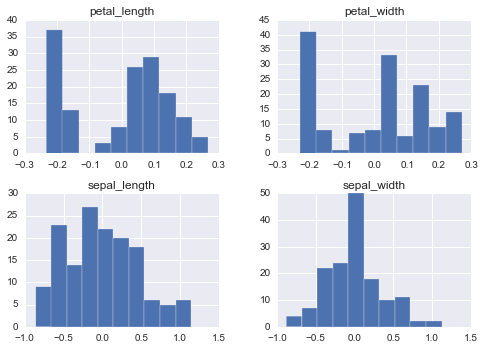

In [166]:
X_weighted.hist();

#### Parallel Coordinates

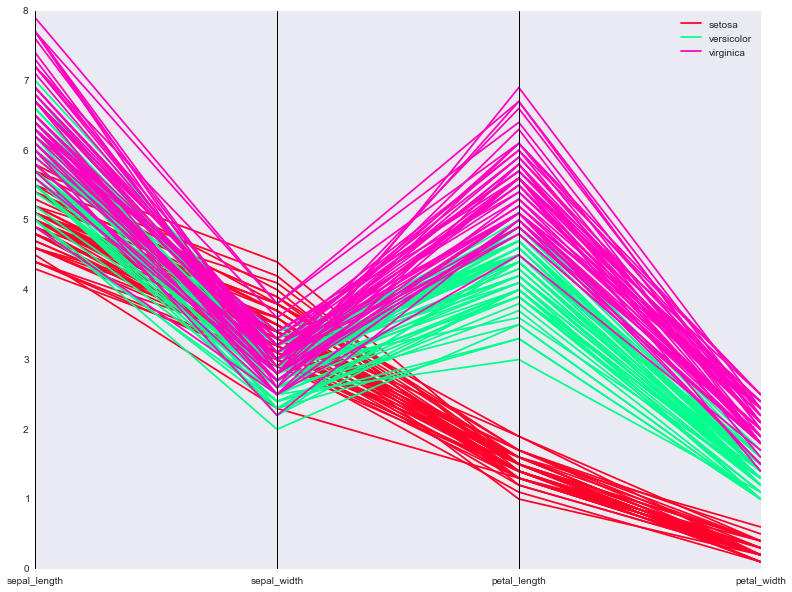

In [167]:
from pandas.tools.plotting import parallel_coordinates
"""
Parallel Coordinates plot of the Iris Dataset
"""

plt.figure(figsize=(13,10))
parallel_coordinates(df, 'species', colormap='gist_rainbow');

### Things to consider with KNN

The KNN results basically depend on 3 things (except for the value of K):


* **Density of your training data**: you should have roughly the same number of samples for each class. Doesn't need to be exact, but I'd say not more than 10% disparity. Otherwise the boundaries will be very fuzzy.
* **Size of your whole training set**: you need to have sufficiently enough examples in your training set so your model can generalize to unknown samples.
* **Noise**: KNN is very sensitive to noise by nature, so you want to avoid noise in your training set as much as possible.


Consider the following example where you're trying to learn a donut-like shape in a 2D space.

By having a different density in your training data (let's say you have more training samples inside of the donut than outside), your decision boundary will be biased like below:

![](assets/9Zx5n.png)

On the other hand, if your classes are relatively balanced, you'll get a much finer decision boundary that will be close to the actual shape of the donut:

![](assets/LPhwn.png)

So it is better to first balance your classes before running KNN. Also take the other 2 points in consideration and you should be fine.

### Sampling Strategy

An example would be to take a random sample of the majority class so that it is limited to the same size as the minority class. More advanced sampling strategies will be covered later. 

In [168]:
# generate some random data
import pandas as pd
import numpy as np
import random
df = pd.DataFrame(np.random.randn(100, 4), columns=['A','B','C','Durian'])

In [169]:
# create label
y = np.concatenate([np.ones(30),np.zeros(70)])
df['y'] = y

In [170]:
df.head()

,A,B,C,Durian,y
0,0.909267,2.515872,0.742656,-0.652113,1
1,0.201478,0.317274,0.245406,-0.476787,1
2,-0.307299,0.659372,0.112329,-0.729202,1
3,-0.595256,-1.172373,-1.075455,2.101311,1
4,2.929943,-0.193196,1.896964,-2.219930,1


In [171]:
# check distribution of classes
df.y.value_counts()

0    70
1    30
dtype: int64

In [172]:
# limit the class size to the smallest class
n = min(df.y.value_counts())
n

30

In [173]:
# what's the majority class?
max_class = int(df.y.value_counts().idxmax())
max_class

0

In [174]:
# random sample the rows from the majority class up 
# to the size of the minority class.
max_rows = random.sample(df[df.y == max_class].index, n)
len(max_rows)

30

In [175]:
# what's the minority class?
min_class = int(df.y.value_counts().idxmin())
min_class

1

In [176]:
# select all the rows of the minority class
min_rows = df[df.y == min_class].index
len(min_rows)

30

In [177]:
# combine the rows from both classes
rows = np.r_[min_rows, max_rows]
len(rows)

60

In [178]:
# Finally we have a dataset with balances classes
df.ix[rows,'y'].value_counts()

1    30
0    30
dtype: int64

![break](assets/voronoi.png)

## Conclusion

#### Advantages

* Very simple implementation.
* Robust with regard to the search space; for instance, classes don't have to be linearly separable.
* Classifier can be updated online at very little cost as new instances with known classes are presented.
* Few parameters to tune: distance metric and k.

#### Disadvantages

* Expensive testing of each instance, as we need to compute its distance to all known instances. Specialized algorithms and heuristics exist for specific problems and distance functions, which can mitigate this issue. This is problematic for datasets with a large number of attributes. When the number of instances is much larger than the number of attributes, a R-tree or a kd-tree can be used to store instances, allowing for fast exact neighbor identification.
* Sensitiveness to noisy or irrelevant attributes, which can result in less meaningful distance numbers. Scaling and/or feature selection are typically used in combination with kNN to mitigate this issue.
* Sensitiveness to very unbalanced datasets, where most entities belong to one or a few classes, and infrequent classes are therefore often dominated in most neighborhoods. This can be alleviated through balanced sampling of the more popular classes in the training stage, possibly coupled with ensembles.

![break](assets/voronoi.png)

## Challenge

* Build a nested loop, where the outer loop iterates through values of K, and the inner loop crossvalidates the score.

* Compare how the various features and combinations of features perform. Use the code you built for the previous  point.

Using the [skin segmentation dataset](http://archive.ics.uci.edu/ml/datasets/Skin+Segmentation) build a KNN model which uses training and testing data with and cross validates the model!

* Load the Data
* Clean the Data
* EDA
* Cross Validation
* Perform KNN

### Decision Tress
### Random Forests
### Naive Bayes

![break](assets/theory.png)

## Clustering
### K-Means

![break](assets/theory.png)

## Challenge : Cleaning up factors with NLP and Graph Techniques

![break](assets/theory.png)